IMPORT LIBRARY

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

IMPORT DATASET

In [215]:
! pip install -q kaggle
! mkdir ~/.kaggle

# Menyalin berkas kaggle.json pada direktori aktif saat ini ke folder .kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [216]:
! kaggle datasets download -d mfaisalqureshi/hr-analytics-and-job-prediction

hr-analytics-and-job-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [217]:
# Mengekstrak berkas zip ke direktori aktif saat ini
!unzip /content/hr-analytics-and-job-prediction.zip

Archive:  /content/hr-analytics-and-job-prediction.zip
replace HR_comma_sep.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: HR_comma_sep.csv        


# EXPLORATORY DATA ANALISIS

In [218]:
df = pd.read_csv('HR_comma_sep.csv')

Dataset
* Left adalah target data yang merupakan tipe variabel Boolean dan hanya memiliki nilai yang mungkin: 0 berarti karyawan masih bekerja dengan perusahaan, 1 – karyawan keluar dari perusahaan.
* satisfaction_level - Tingkat kepuasan kerja yang dilaporkan karyawan dalam skala dari 0 hingga 1
* last_evaluation - Skor tinjauan kinerja terakhir karyawan juga diskalakan dari 0 hingga 1
* number_project - Jumlah kontribusi karyawan proyek
* average_monthly_hours - Jumlah rata-rata jam kerja karyawan per bulan
* time_spend_company - Berapa lama karyawan telah bekerja di perusahaan (tahun)
* Work_accident - Apakah karyawan mengalami kecelakaan saat bekerja atau tidak (0 – tidak, 1- ya)
* promotion_last_5years - Apakah karyawan dipromosikan atau tidak dalam 5 tahun terakhir (0 – tidak, 1- ya)
* Department - Departemen karyawan (nilai kategoris)
* Salary - Gaji karyawan (categorical values – high, medium, low)

In [219]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.3800000,0.5300000,2,157,3,0,1,0,sales,low
1,0.8000000,0.8600000,5,262,6,0,1,0,sales,medium
2,0.1100000,0.8800000,7,272,4,0,1,0,sales,medium
3,0.7200000,0.8700000,5,223,5,0,1,0,sales,low
4,0.3700000,0.5200000,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.4000000,0.5700000,2,151,3,0,1,0,support,low
14995,0.3700000,0.4800000,2,160,3,0,1,0,support,low
14996,0.3700000,0.5300000,2,143,3,0,1,0,support,low
14997,0.1100000,0.9600000,6,280,4,0,1,0,support,low


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [221]:
df.columns = df.columns.str.lower()

In [222]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,14999.0000000,14999.0000000,14999.0000000,14999.0000000,14999.0000000,14999.0000000,14999.0000000,14999.0000000
mean,0.6128335,0.7161017,3.8030535,201.0503367,3.4982332,0.1446096,0.2380825,0.0212681
std,0.2486307,0.1711691,1.2325924,49.9430994,1.4601362,0.3517186,0.4259241,0.1442815
min,0.0900000,0.3600000,2.0000000,96.0000000,2.0000000,0.0000000,0.0000000,0.0000000
25%,0.4400000,0.5600000,3.0000000,156.0000000,3.0000000,0.0000000,0.0000000,0.0000000
50%,0.6400000,0.7200000,4.0000000,200.0000000,3.0000000,0.0000000,0.0000000,0.0000000
75%,0.8200000,0.8700000,5.0000000,245.0000000,4.0000000,0.0000000,0.0000000,0.0000000
max,1.0000000,1.0000000,7.0000000,310.0000000,10.0000000,1.0000000,1.0000000,1.0000000


In [223]:
# cek missing value
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [224]:
# mengecek jumlah karyawan yang keluar
left = df[df.left == 1]
left.shape

(3571, 10)

In [225]:
# mengecek jumlah karyawan yang belum keluar
retained = df[df.left==0]
retained.shape

(11428, 10)

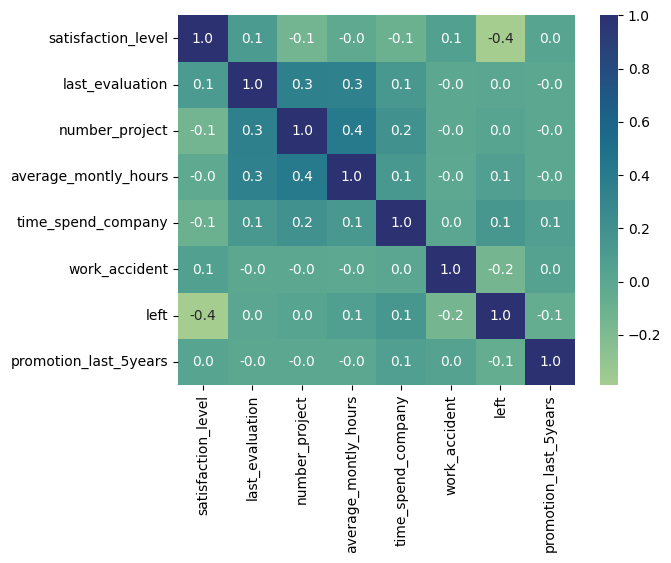

In [226]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.1f', cmap='crest')
plt.show()

hanya ada 8 variable karena 2 variable lagi yaitu salary dan department adalah category

kesimpulan:
* terdapat korelasi antara number_of_projects, monthly_hours dan evaluation_secores
* tidak ada hubungan signifikan yang terjadi kepada statisfaction_level dengan time_spend_company
* kepergian pegawai memiliki hubungan yang negatif terhadap satisfaction_level dan memiliki hubungan yang baik pada tunere (semakin lama bekerja semakin kurang keinginan karyawan untuk keluar)

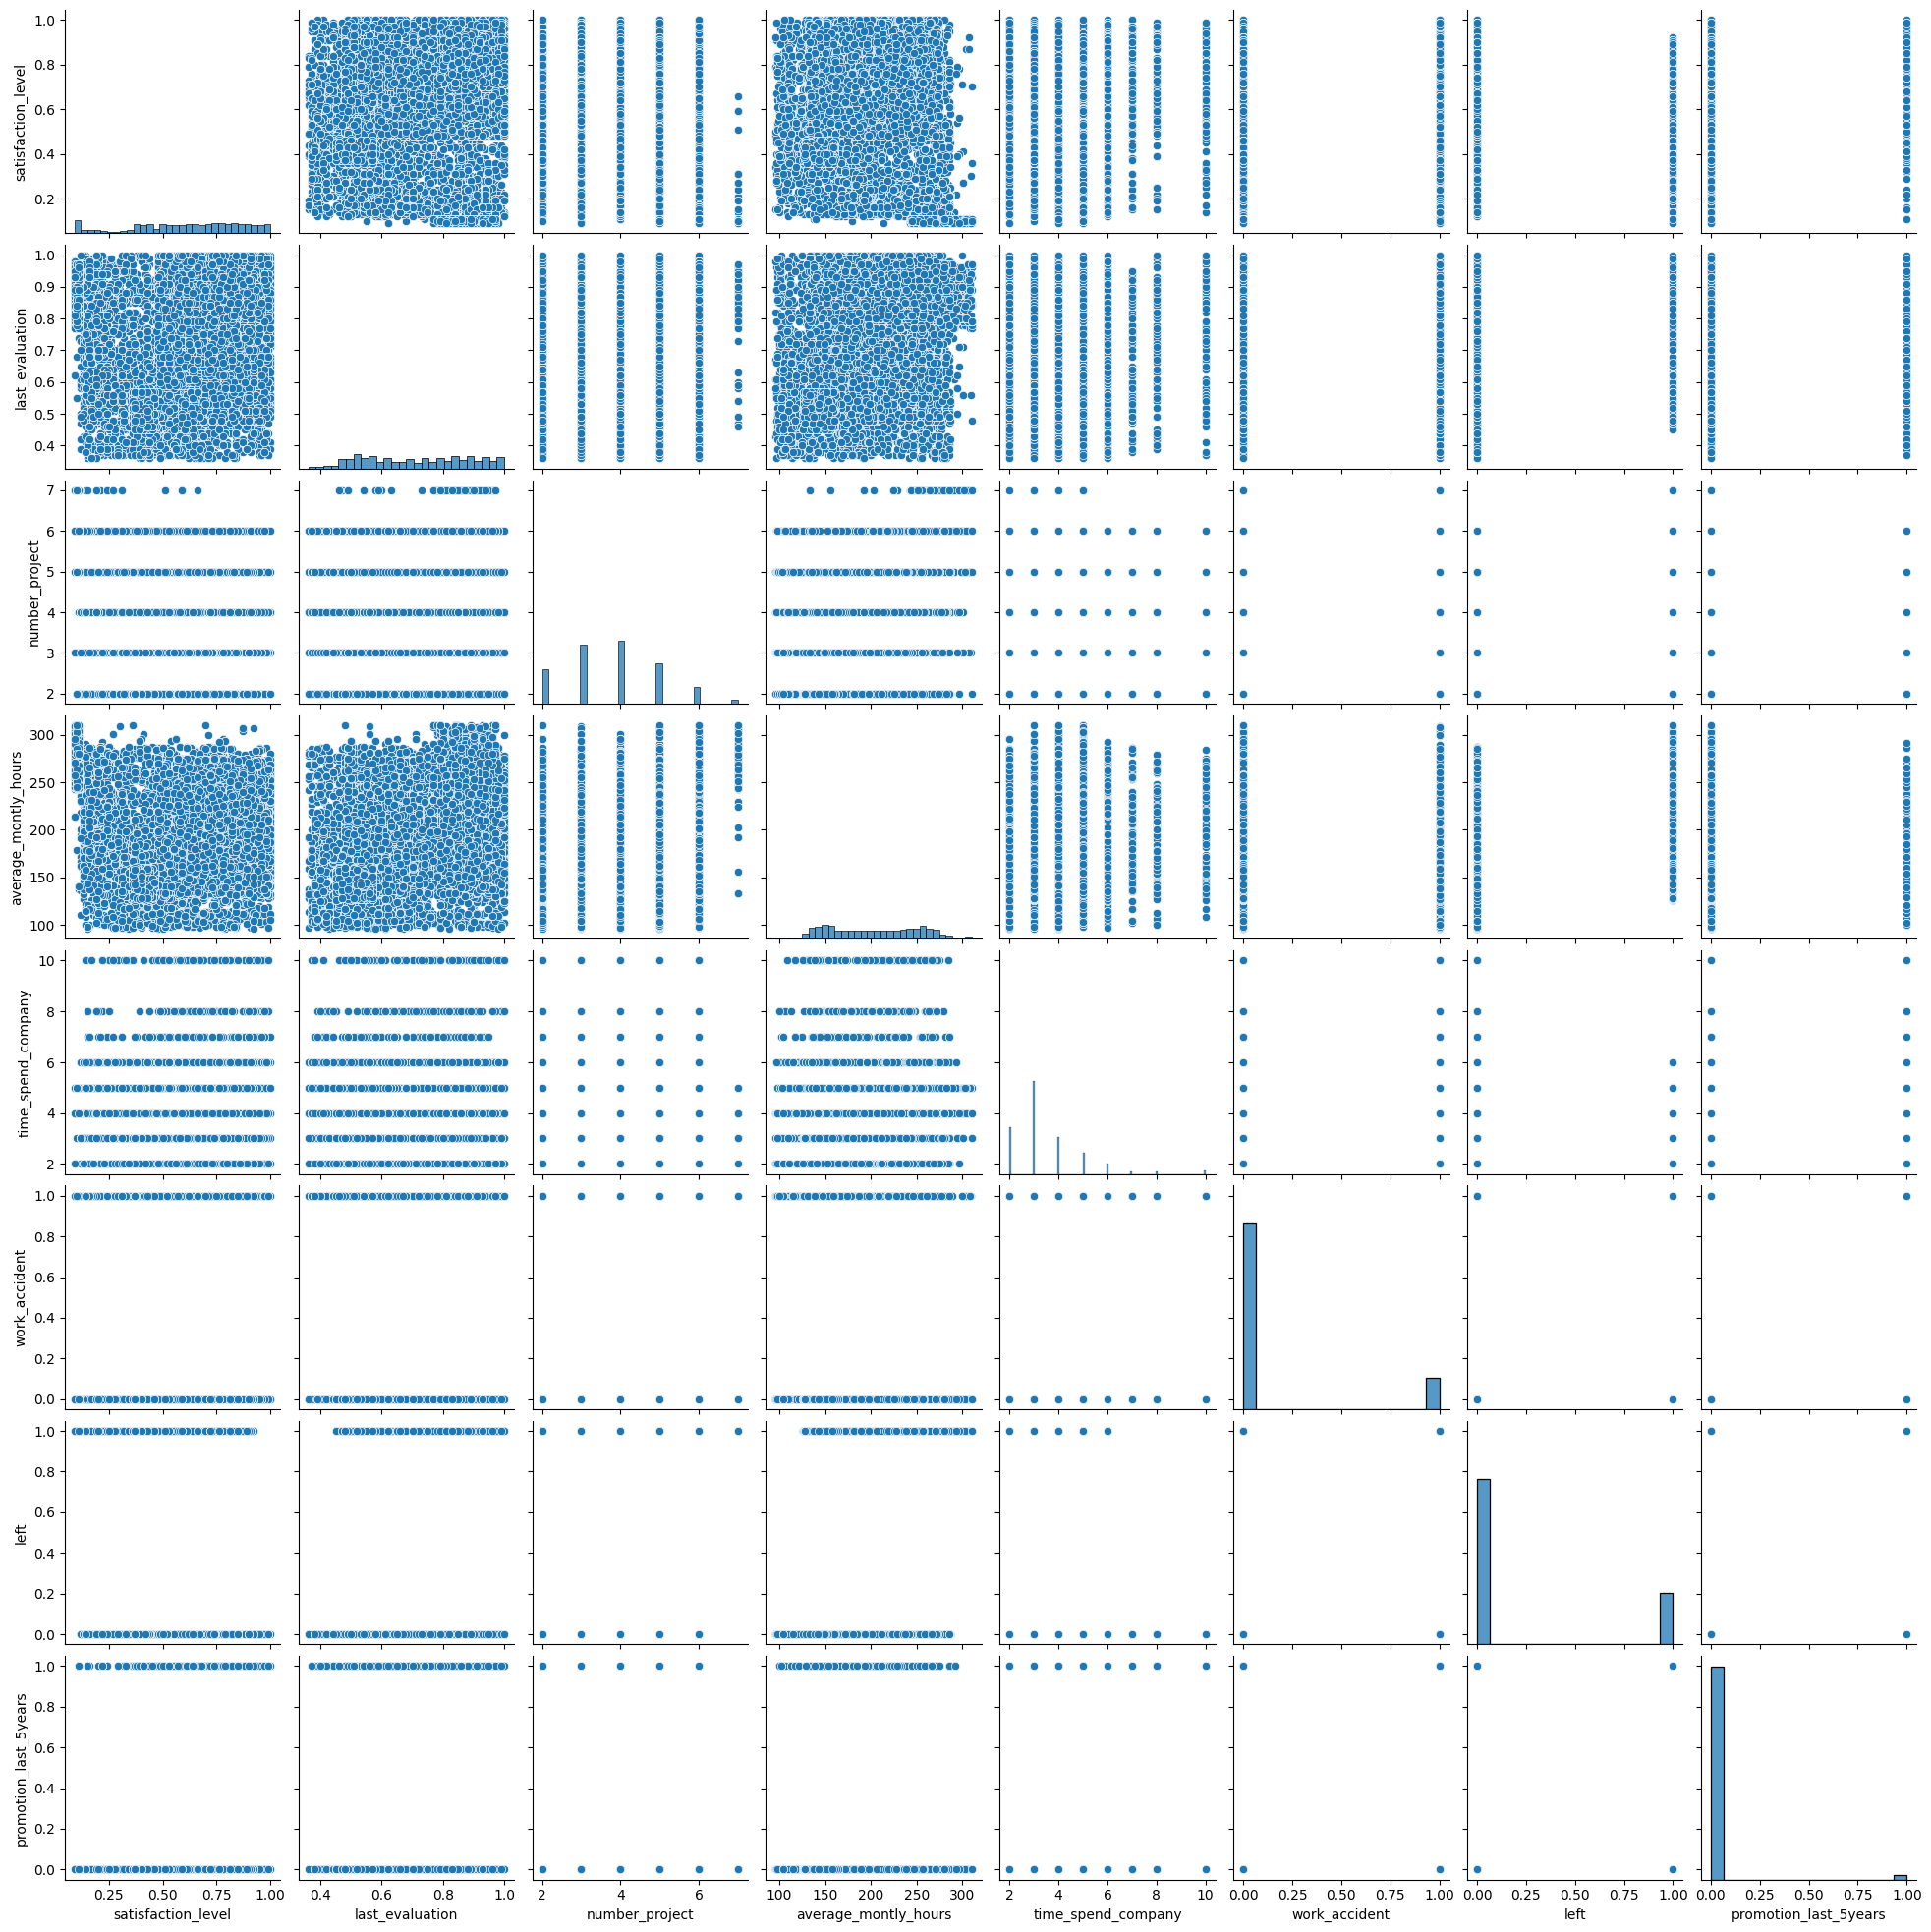

In [227]:
sns.pairplot(df)

korelasi antara satisfaction level dan salary

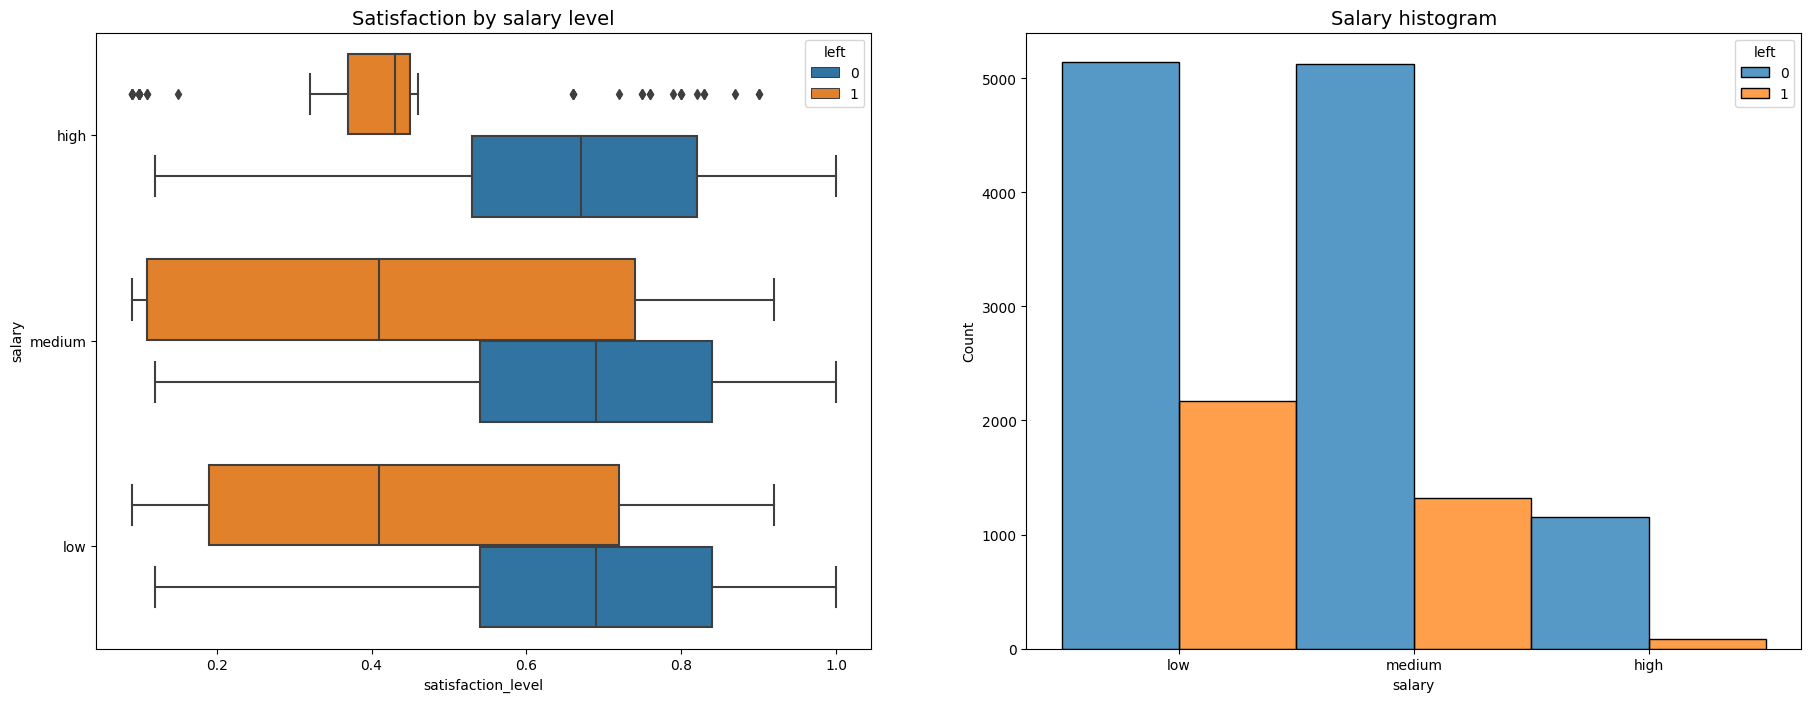

In [228]:
# set figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22,8))
# membuat boxplot untuk menampilkan distribusi antara satisfaction level dan salary
sns.boxplot(data=df, x='satisfaction_level', y='salary', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by salary level', fontsize='14')

# membuat perbandingan antara pegawai yang bertahan dan tidak
sns.histplot(data=df, x='salary', hue='left', multiple='dodge', shrink=1, ax=ax[1])
ax[1].set_title('Salary histogram', fontsize=14)
plt.show()

kebanyakan karyawan yang keluar berada pada pembayaran low dan medium

<Axes: xlabel='department'>

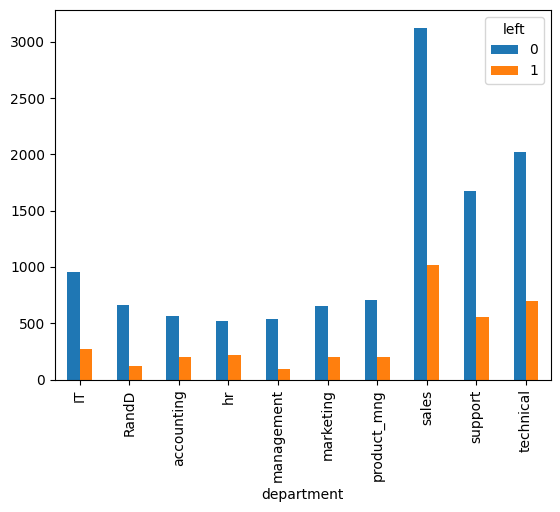

In [229]:
pd.crosstab(df.department,df.left).plot(kind='bar')

### grafik plot chart untuk left(target)

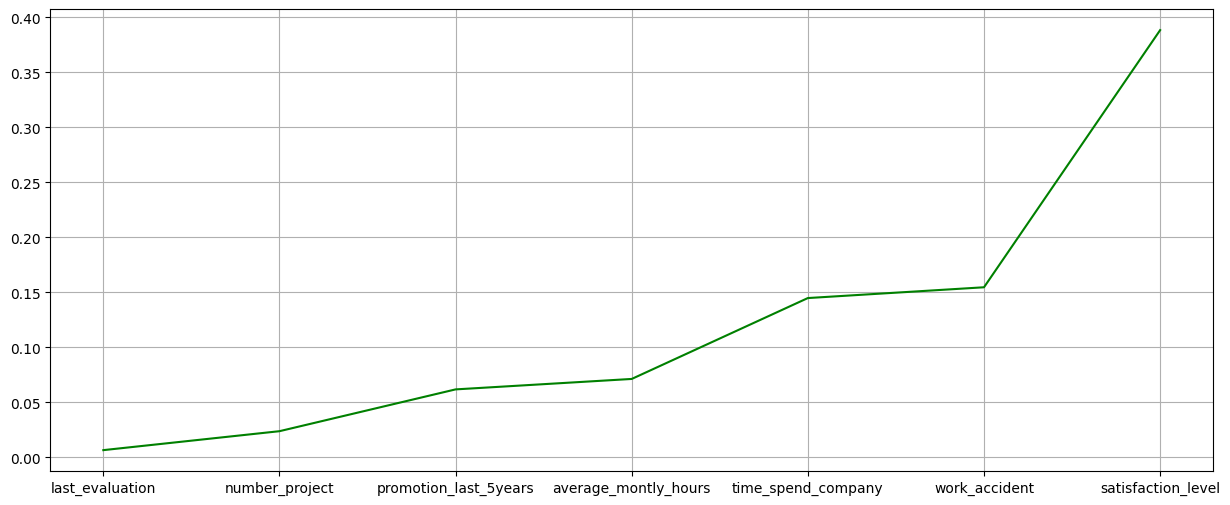

In [230]:
plt.figure(figsize=(15, 6))
plt.plot(abs(corr['left']).sort_values()[:-1].index, abs(corr['left']).sort_values()[:-1], color='green')
plt.grid()
plt.show()

terlihat bahwa "last_evaluation" tidak memiliki korelasi terhadap left

In [231]:
hr_left = df.drop(columns=['last_evaluation', 'department'])
hr_left.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   number_project         14999 non-null  int64  
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   work_accident          14999 non-null  int64  
 5   left                   14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   salary                 14999 non-null  object 
dtypes: float64(1), int64(6), object(1)
memory usage: 937.6+ KB


### mengubah data object menjadi numerik dengan menggunakan teknik one-hot-encoding

In [232]:
hr_dummy = pd.get_dummies(hr_left, columns=['salary'])
hr_dummy

,satisfaction_level,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.3800000,2,157,3,0,1,0,0,1,0
1,0.8000000,5,262,6,0,1,0,0,0,1
2,0.1100000,7,272,4,0,1,0,0,0,1
3,0.7200000,5,223,5,0,1,0,0,1,0
4,0.3700000,2,159,3,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.4000000,2,151,3,0,1,0,0,1,0
14995,0.3700000,2,160,3,0,1,0,0,1,0
14996,0.3700000,2,143,3,0,1,0,0,1,0
14997,0.1100000,6,280,4,0,1,0,0,1,0


### Train Test Split

In [233]:
from sklearn.model_selection import train_test_split

x = hr_dummy.drop(columns=['left'])
y = hr_dummy.left

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 210)
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Total # of sample in test dataset: {len(x_test)}')

Total # of sample in train dataset: 10499
Total # of sample in test dataset: 4500


In [234]:
x_train.head()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,salary_high,salary_low,salary_medium
1393,0.8200000,4,246,5,0,0,0,0,1
5177,0.8800000,5,267,3,0,0,0,1,0
12864,0.9400000,2,273,4,0,0,0,1,0
8102,0.7100000,2,199,2,0,0,0,1,0
3423,0.6500000,6,131,5,0,0,0,0,1


# models

## Scaler

In [235]:
from sklearn.preprocessing import StandardScaler

x = hr_dummy.drop(columns=['left'])
y = hr_dummy.left

scaler = StandardScaler()
x = scaler.fit_transform(x)
x

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 150)

## KNN

In [236]:
from sklearn.neighbors import KNeighborsClassifier


# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [237]:
train_accuracy_knn = knn.score(x_train, y_train)
test_accuracy_knn = accuracy_score(y_test, y_pred)

print("K-Nearest Neighbors (KNN):")
print("Train Accuracy:", train_accuracy_knn)
print("Test Accuracy:", test_accuracy_knn)
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

K-Nearest Neighbors (KNN):
Train Accuracy: 0.9699018954186113
Test Accuracy: 0.9653333333333334

Confusion Matrix:
[[3358   77]
 [  79  986]]


## Random Forest

In [238]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=123)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [239]:
train_accuracy_rf = rf.score(x_train, y_train)
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest:")
print("Train Accuracy:", train_accuracy_rf)
print("Test Accuracy:", test_accuracy_rf)
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest:
Train Accuracy: 0.9992380226688256
Test Accuracy: 0.9877777777777778

Confusion Matrix:
[[3419   16]
 [  39 1026]]


# Evaluation

In [240]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# KNN
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# RandomForest
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)


In [241]:
print("K-Nearest Neighbors")
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)
print()
print("Random Forest")
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R2 Score:", r2_rf)

K-Nearest Neighbors
MSE: 0.034666666666666665
RMSE: 0.18618986725025255
R2 Score: 0.8081062795989913

Random Forest
MSE: 0.012222222222222223
RMSE: 0.11055415967851333
R2 Score: 0.9323451626791316


In [242]:
final_report = {'Model_Name': [], 'mse': [], 'r2': []}
pred = knn.predict(x_test)
mse = mean_squared_error(y_true=y_test, y_pred=pred)
r2 = r2_score(y_test, pred)
final_report['Model_Name'].append('knn')
final_report['mse'].append(mse)
final_report['r2'].append(r2)

pred = rf.predict(x_test)
mse = mean_squared_error(y_true=y_test, y_pred=pred)
r2 = r2_score(y_test, pred)
final_report['Model_Name'].append('RF')
final_report['mse'].append(mse)
final_report['r2'].append(r2)

In [243]:
pd.options.display.float_format = '{:.7f}'.format


In [244]:
final_report = pd.DataFrame.from_dict(final_report)
final_report

,Model_Name,mse,r2
0,knn,0.0346667,0.8081063
1,RF,0.0122222,0.9323452
